<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    59.935677  99.790111  60.114893 -2357.756624 -2127.915944   
      1.0    50.827318  98.569759  33.614322  9061.271323  9254.282722   
      2.0    24.545988  66.595584  92.084440 -3497.542471 -3304.316459   
      3.0    50.592609  23.761123  40.223137  -201.293274   -76.716406   
      4.0    99.865925  78.981380  92.221617 -3481.811627 -3200.742705   
...                ...        ...        ...          ...          ...   
999.0 115.0  98.965268  24.498232  51.806091   317.211992   502.481584   
      116.0  93.743166  86.395752  41.932430 -1598.102997 -1366.031648   
      117.0  71.090345  54.959510  21.168766   424.720176   581.938797   
      118.0  49.795764  94.164855  23.509605 -4509.610804 -4332.140580   
      119.0  85.504609  90.507280  48.522279  -607.169050  -372.634883   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    306.965838 -2434.881782  
      1.0    821.159937  8433.122786  
      2.0   -453.369804 -2850.946655  
      3.0    318.277861  -394.994268  
      4.0   -448.723677 -2752.019027  
...                 ...          ...  
999.0 115.0 -449.679914   952.161498  
      116.0   80.439422 -1446.471070  
      117.0  200.446080   381.492717  
      118.0  696.045271 -5028.185851  
      119.0  170.691580  -543.326463  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    59.935677  99.790111  60.114893 -2357.756624 -2127.915944   
      1.0    50.827318  98.569759  33.614322  9061.271323  9254.282722   
      2.0    24.545988  66.595584  92.084440 -3497.542471 -3304.316459   
      3.0    50.592609  23.761123  40.223137  -201.293274   -76.716406   
      4.0    99.865925  78.981380  92.221617 -3481.811627 -3200.742705   
...                ...        ...        ...          ...          ...   
999.0 115.0  98.965268  24.498232  51.806091   317.211992   502.481584   
      116.0  93.743166  86.395752  41.932430 -1598.102997 -1366.031648   
      117.0  71.090345  54.959510  21.168766   424.720176   581.938797   
      118.0  49.795764  94.164855  23.509605 -4509.610804 -4332.140580   
      119.0  85.504609  90.507280  48.522279  -607.169050  -372.634883   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    306.965838 -2434.881782  
      1.0    821.159937  8433.122786  
      2.0   -453.369804 -2850.946655  
      3.0    318.277861  -394.994268  
      4.0   -448.723677 -2752.019027  
...                 ...          ...  
999.0 115.0 -449.679914   952.161498  
      116.0   80.439422 -1446.471070  
      117.0  200.446080   381.492717  
      118.0  696.045271 -5028.185851  
      119.0  170.691580  -543.326463  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.935677,99.790111,60.114893,-2357.756624,-2127.915944,306.965838,-2434.881782
1,0.0,1.0,50.827318,98.569759,33.614322,9061.271323,9254.282722,821.159937,8433.122786
2,0.0,2.0,24.545988,66.595584,92.084440,-3497.542471,-3304.316459,-453.369804,-2850.946655
3,0.0,3.0,50.592609,23.761123,40.223137,-201.293274,-76.716406,318.277861,-394.994268
4,0.0,4.0,99.865925,78.981380,92.221617,-3481.811627,-3200.742705,-448.723677,-2752.019027
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.965268,24.498232,51.806091,317.211992,502.481584,-449.679914,952.161498
119996,999.0,116.0,93.743166,86.395752,41.932430,-1598.102997,-1366.031648,80.439422,-1446.471070
119997,999.0,117.0,71.090345,54.959510,21.168766,424.720176,581.938797,200.446080,381.492717
119998,999.0,118.0,49.795764,94.164855,23.509605,-4509.610804,-4332.140580,696.045271,-5028.185851


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    59.935677  99.790111  60.114893 -2357.756624 -2127.915944   
      1.0    50.827318  98.569759  33.614322  9061.271323  9254.282722   
      2.0    24.545988  66.595584  92.084440 -3497.542471 -3304.316459   
      3.0    50.592609  23.761123  40.223137  -201.293274   -76.716406   
      4.0    99.865925  78.981380  92.221617 -3481.811627 -3200.742705   
...                ...        ...        ...          ...          ...   
999.0 115.0  98.965268  24.498232  51.806091   317.211992   502.481584   
      116.0  93.743166  86.395752  41.932430 -1598.102997 -1366.031648   
      117.0  71.090345  54.959510  21.168766   424.720176   581.938797   
      118.0  49.795764  94.164855  23.509605 -4509.610804 -4332.140580   
      119.0  85.504609  90.507280  48.522279  -607.169050  -372.634883   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    306.965838 -2434.881782  
      1.0    821.159937  8433.122786  
      2.0   -453.369804 -2850.946655  
      3.0    318.277861  -394.994268  
      4.0   -448.723677 -2752.019027  
...                 ...          ...  
999.0 115.0 -449.679914   952.161498  
      116.0   80.439422 -1446.471070  
      117.0  200.446080   381.492717  
      118.0  696.045271 -5028.185851  
      119.0  170.691580  -543.326463  

[120000 rows x 7 columns]

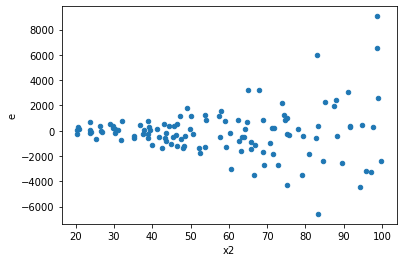

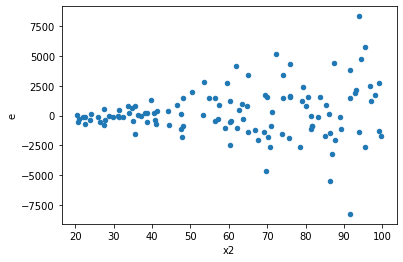

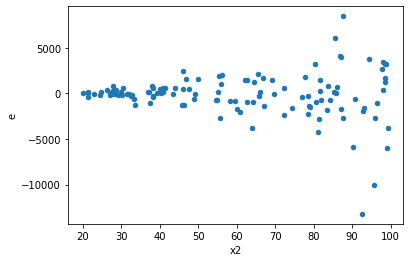

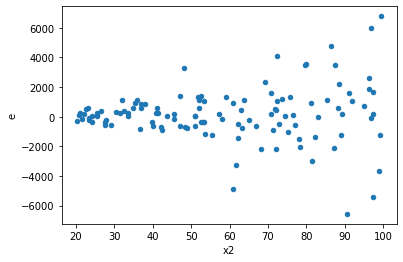

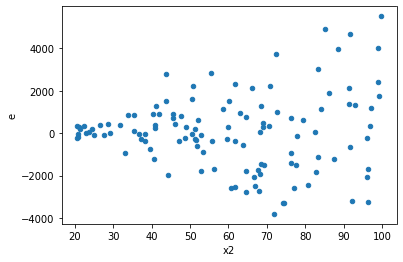

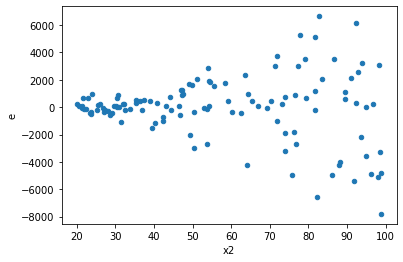

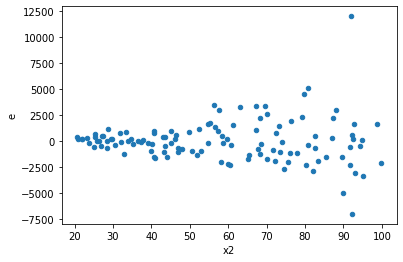

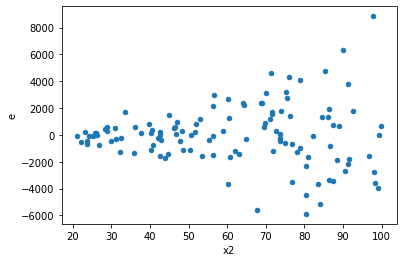

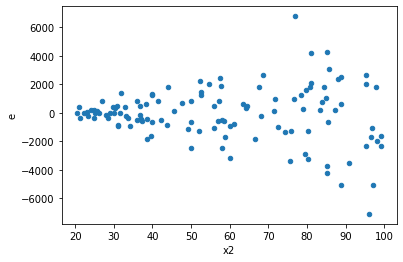

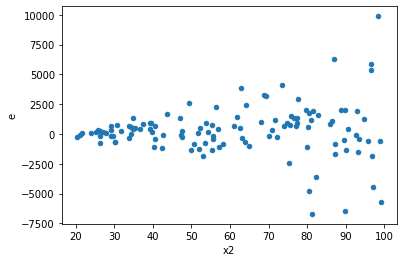

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,61.0,53.0,141810950.40962046,224659560.7393543,2324769.6788462372,4238859.636591591,1.82334606097207,0.02682464247092442,0.9865876787645378,0.01341232123546221,Reject001=1 : Homoscedasticity
4.0,54.0,60.0,157451976.4284637,195738867.07603952,2915777.341267846,3262314.4512673253,1.1188489618513864,0.6697777946524279,0.665111102673786,0.33488889732621396,Reject001=1 : Homoscedasticity
5.0,67.0,47.0,64753935.991473764,539704343.2913315,966476.6565891607,11483071.133858118,11.881374532504053,4.440892098500626e-15,0.9999999999999978,2.220446049250313e-15,Reject001=0 : Heteroscedasticity
6.0,64.0,50.0,175369956.99463192,307666434.53250957,2740155.5780411237,6153328.690650191,2.245612891458181,0.003492153490832317,0.9982539232545838,0.0017460767454161585,Reject001=0 : Heteroscedasticity
7.0,53.0,61.0,241049591.82755888,312639869.7588804,4548105.506180356,5125243.766539022,1.126896409851179,0.6493858881004493,0.6753070559497754,0.32469294405022464,Reject001=1 : Homoscedasticity
8.0,60.0,54.0,60076801.40750783,343587692.2218678,1001280.0234584638,6362735.0411457,6.354601002792947,1.2507817004347999e-10,0.9999999999374609,6.253908502173999e-11,Reject001=0 : Heteroscedasticity
10.0,55.0,59.0,114333091.46872272,246766541.25995955,2078783.481249504,4182483.750168806,2.01198623516809,0.008960881670591059,0.9955195591647045,0.004480440835295529,Reject001=0 : Heteroscedasticity
11.0,67.0,47.0,319863389.03544927,377179094.6847359,4774080.433364915,8025087.120951828,1.68097023771665,0.06183978436896953,0.9690801078155152,0.030919892184484765,Reject001=1 : Homoscedasticity
12.0,58.0,56.0,163045274.1911264,279176828.0680219,2811125.417088386,4985300.501214677,1.773418030696825,0.032888494199329044,0.9835557529003355,0.016444247099664522,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,61.0,53.0,141810950.40962046,224659560.7393543,2324769.6788462372,4238859.636591591,1.82334606097207,0.02682464247092442,Reject001=1 : Homoscedasticity
1.0,61.0,53.0,456614340.1922535,67225446.20367607,7485480.986758254,1268404.6453523787,0.16944864967210188,1.5050862644436504e-10,Reject001=0 : Heteroscedasticity
2.0,52.0,62.0,594991014.5124243,58496929.15612897,11442134.894469699,943498.8573569189,0.08245828825291493,2.332275542604894e-16,Reject001=0 : Heteroscedasticity
3.0,49.0,65.0,313778445.8191331,65885242.613913365,6403641.751410879,1013619.1171371287,0.158287917482861,5.061178331856134e-10,Reject001=0 : Heteroscedasticity
4.0,54.0,60.0,157451976.4284637,195738867.07603952,2915777.341267846,3262314.4512673253,1.1188489618513864,0.6697777946524279,Reject001=1 : Homoscedasticity
5.0,67.0,47.0,64753935.991473764,539704343.2913315,966476.6565891607,11483071.133858118,11.881374532504053,4.440892098500626e-15,Reject001=0 : Heteroscedasticity
6.0,64.0,50.0,175369956.99463192,307666434.53250957,2740155.5780411237,6153328.690650191,2.245612891458181,0.003492153490832317,Reject001=0 : Heteroscedasticity
7.0,53.0,61.0,241049591.82755888,312639869.7588804,4548105.506180356,5125243.766539022,1.126896409851179,0.6493858881004493,Reject001=1 : Homoscedasticity
8.0,60.0,54.0,60076801.40750783,343587692.2218678,1001280.0234584638,6362735.0411457,6.354601002792947,1.2507817004347999e-10,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      508
Reject001=0 : Heteroscedasticity    492
Name: Result_test, dtype: int64